# Vignette: using the ews toolbox

Here, we assume the data is a timeseries before a transition (so we will use a rolling window), following Dakos et al. PlosOne. We will expand this toolbox to multivariate data, and solve issues with interpolation and smoothing. Later we will make a toolbox that deals with sets of timeseries to compare different groups.  

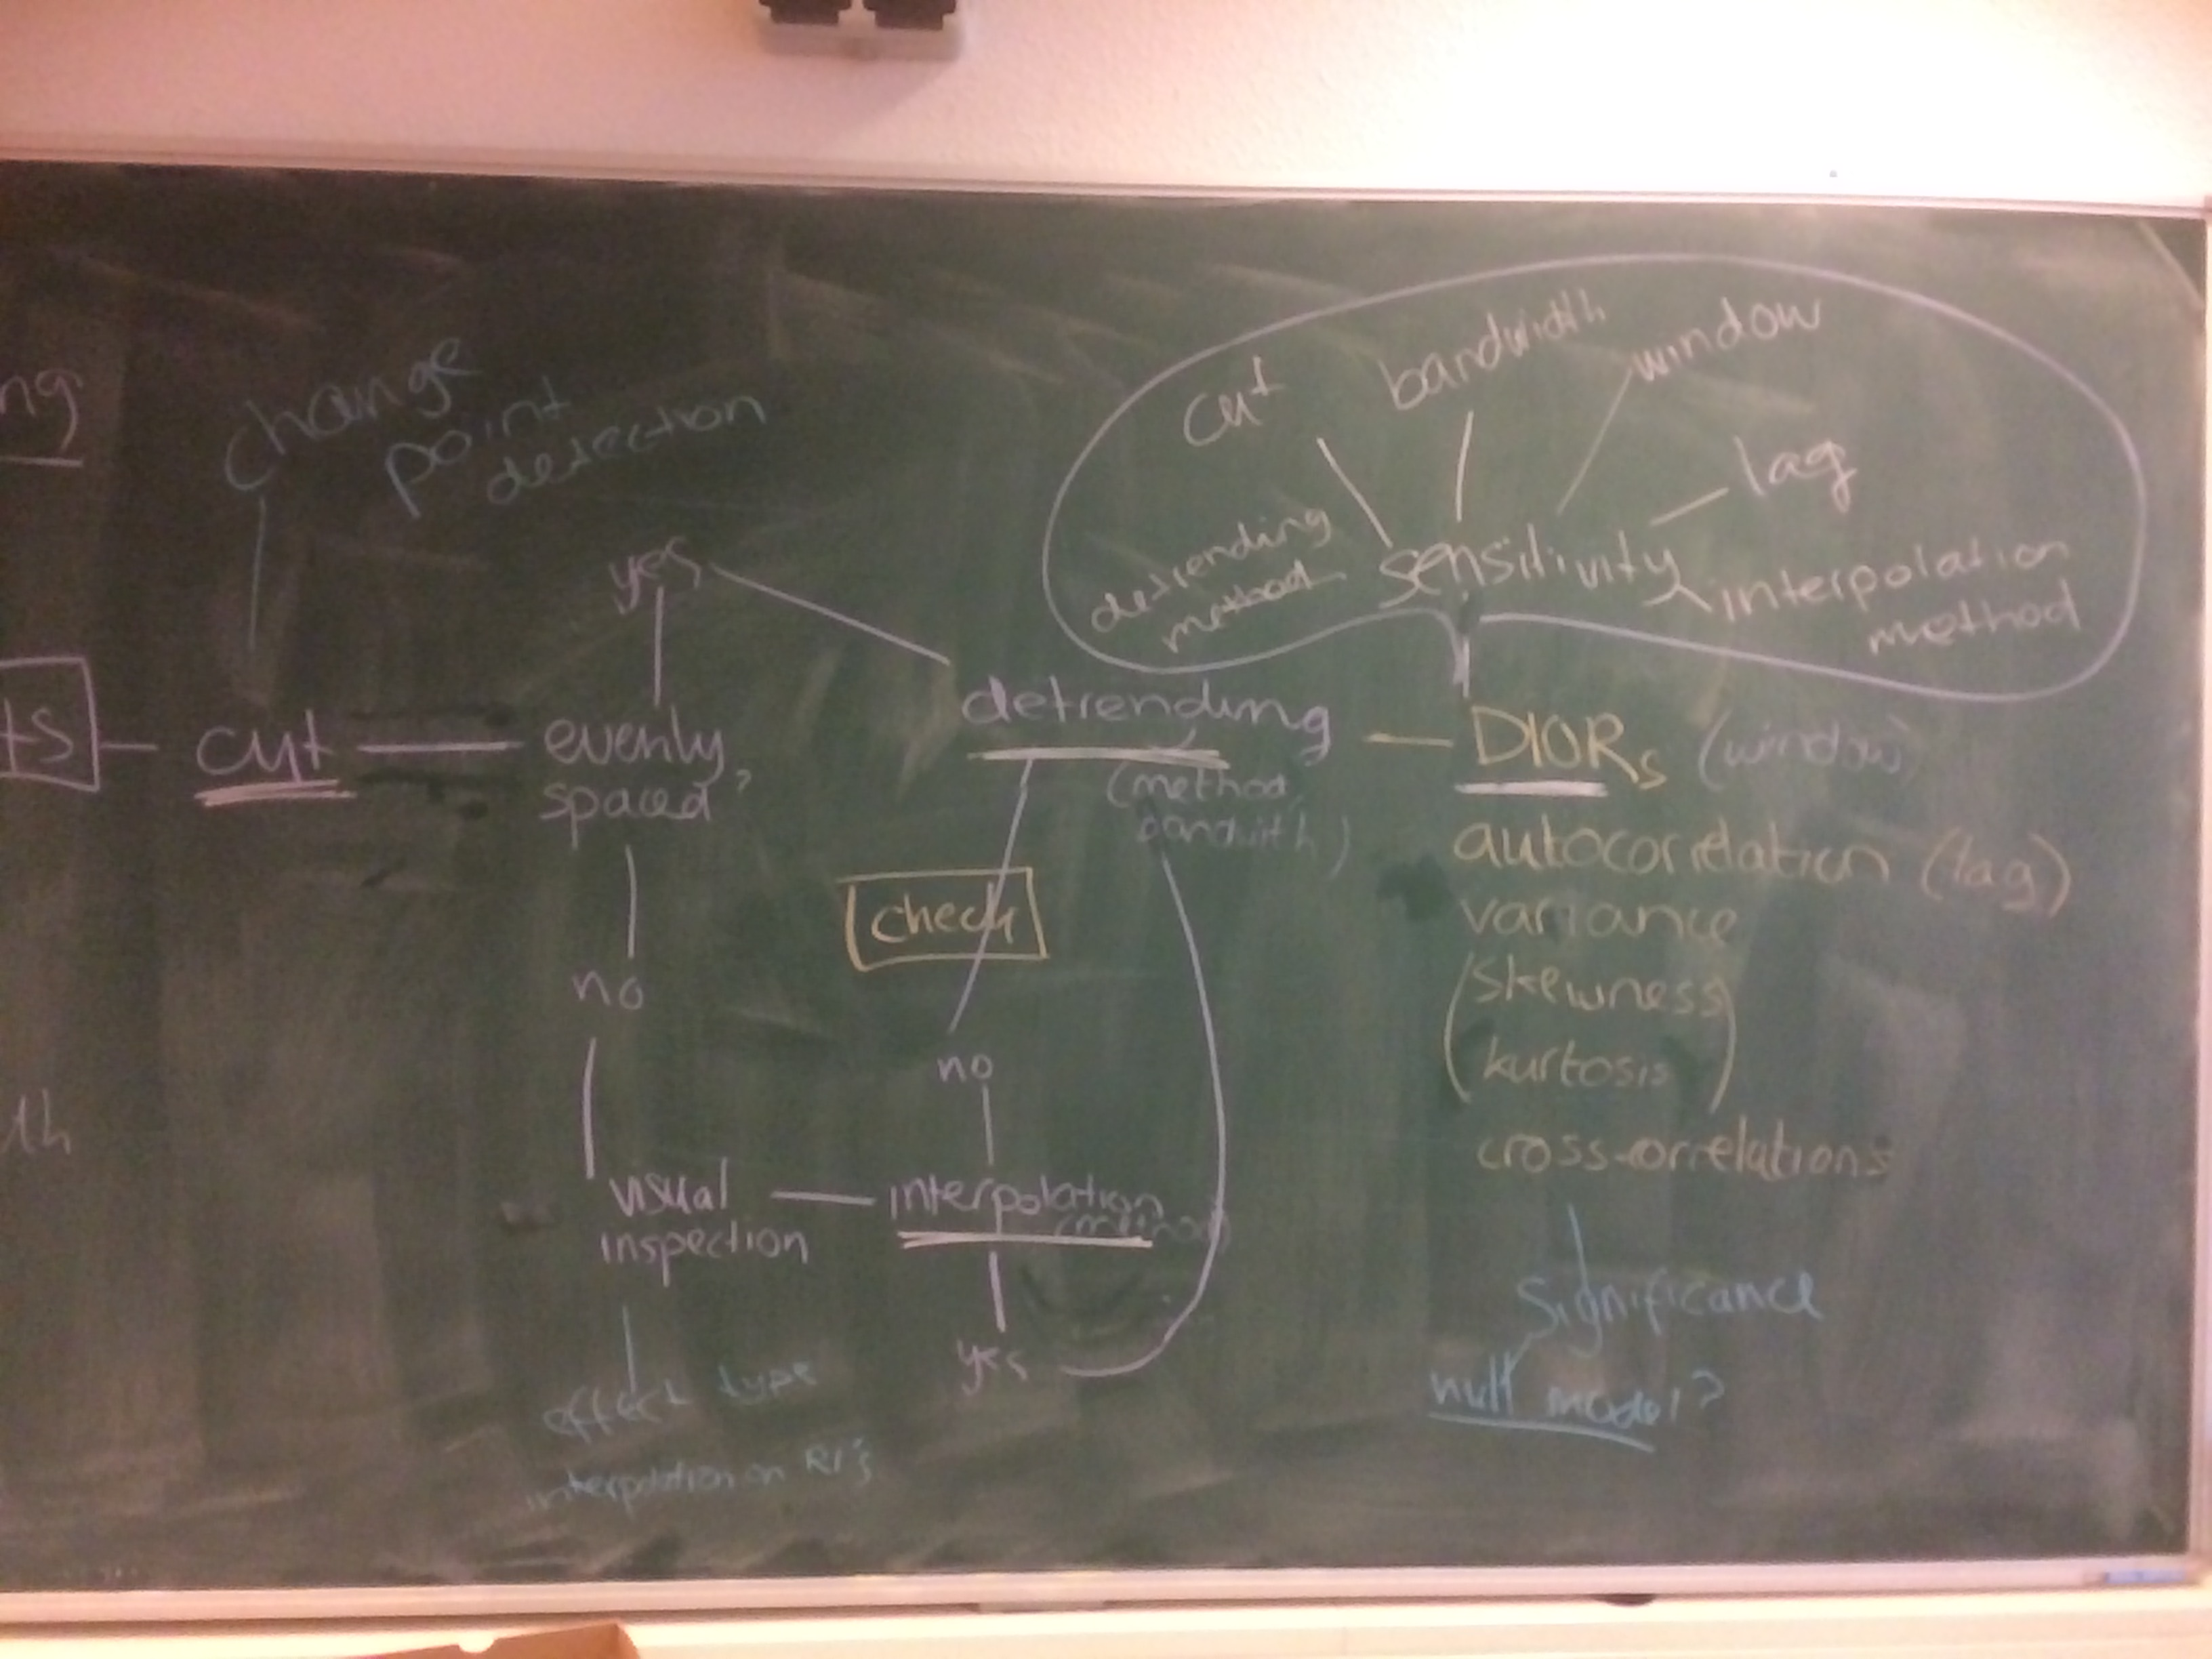

In [23]:
from IPython.display import Image
Image(filename='Decision_tree_ews.jpg', width= 600)

In [24]:
#to plot inline in notebook
%matplotlib inline 

#import relevant libraries
import numpy as np
import pandas as pd
import earlywarningsignals as ews
import matplotlib.pyplot as plt

### Load data as pandas dataframe

In [25]:
ts=pd.read_csv('../data/dataset 3.txt', sep="\t", index_col=0)
ts.head()

,X1,X2
t,,
0,1.080549,0.937206
1,1.081517,0.920140
2,1.039920,0.868303
3,1.030189,0.902814
4,0.924806,0.856872


### Check timeseries format

Function returns an error if timeseries is in wrong format

In [26]:
ts,tsi=ews.check_time_series(ts)
# use a try/catch (matlab) format: try/exept (python)
#print(tsi)
# Bregje: update check_timeseries such that ts is checked for strings, and tests are working

### Visual inspection raw data

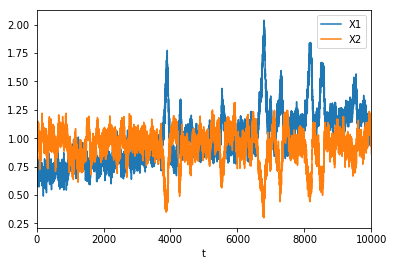

In [27]:
ts.plot()

## Preprocessing

https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem

### Cutting: select timepoints preceding transition

Ingrid: Explain how to make this choice... not so obvious. 

### Change point detection (?)

### Regular spacing?

Test whether your timeseries is regularly spaced or not. If it is not, you should consider to interpolate. 

In [6]:
ews.isUniformSpacing(tsi)

True

### Irregular spacing: interpolation?

Visually inspect interval sizes

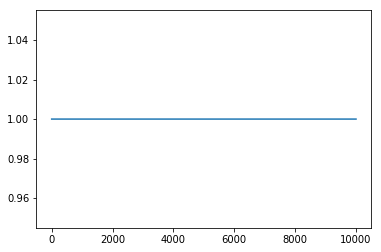

In [7]:
plt.plot(np.diff(tsi))

Ingrid: Interpolation: which interpolation method to choose in which situation? Can we explain this sensibly?

In [8]:
# Pablo: Code to perform and plot result of interpolation

### Detrending 

Ingrid: Detrending: which detrending method to choose in which situation? Can we explain this sensibly?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE211D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DDB19E8>], dtype=object)

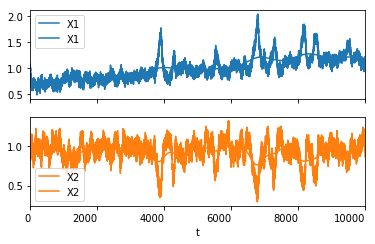

In [28]:
#Gaussian detrending with default bandwidth
ts_trend, ts_residual=ews.detrend(ts, detrending='gaussian')
ax=ts.plot(subplots=True)
ts_trend.plot(subplots=True, ax=ax)


Usman: Consider kriging: Gaussian process regression: https://en.wikipedia.org/wiki/Kriging

## Calculate EWS

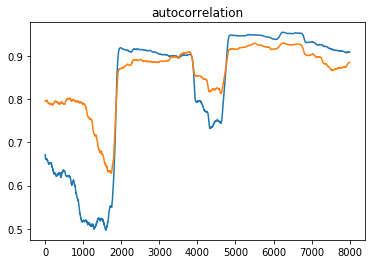

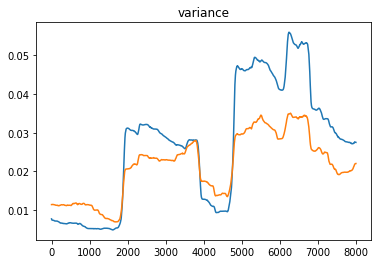

In [29]:
result=ews.EWS(ts,window_size=2000,autocorrelation=True,variance=True)

### Plot early warning signals

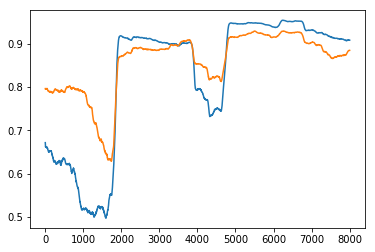

In [30]:
# Els, plot more nicely, with titles, and in one plot
plt.plot(result.get('autocorrelation'))

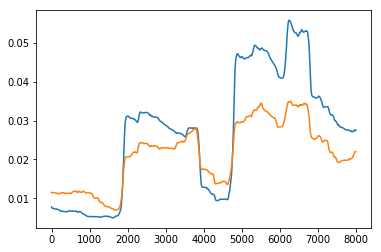

In [31]:
plt.plot(result.get('variance'))

### Significance

In [33]:
ews.kendalltrend(result['autocorrelation'][:,0])
#Els: check what goes wrong in code, and print/ plot output

[0.41982121017677088, 0.0]

### Sensitivity analysis

How robust are the results? When is a result robust or not.. ow to choose this
Parameters:
- cut timepoint
- detrending method / bandwith
- interpolation method / parameter
- window size moving window
- lag autocorrelation